In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import keras.utils
from keras import utils as np_utils

with open("data.csv") as f:
 content = f.readlines()
 
lines = np.array(content)
 
size = lines.size
print("number of instances: ",size)

number of instances:  35888


In [4]:
classes=7
x_train, y_train, x_test, y_test = [], [], [], []
# we converted split the data into test/train 
# we didnt use train_test_split because there is a train/test colume that indicates whether the data is train or test 

for i in range(1,size):
 try:
  emotion, img, usage = lines[i].split(",")
 
  val = img.split(" ")
  pixels = np.array(val, 'float32')
 
  emotion = keras.utils.to_categorical(emotion,classes)
 
  if 'Training' in usage:
   y_train.append(emotion)
   x_train.append(pixels)
  elif 'PublicTest' in usage:
   y_test.append(emotion)
   x_test.append(pixels)
 except:
  print("", end="")

In [15]:
# here we are transforming the data 


x_train /= 255 #normalize inputs between [0, 1]

x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)

x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)

print(x_train.shape[0], 'train samples')

print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [7]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
import keras



#construct CNN structure
cnn = Sequential()

#1st convolution layer
cnn.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
cnn.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2))) 

#3rd convolution layer
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

cnn.add(Flatten())

#fully connected neural networks
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=256
epochs=25
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)
cnn.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)
cnn.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs)

Epoch 1/25
256/256 [==============================] - 82s 319ms/step - loss: 1.7549 - acc: 0.3068
Epoch 2/25
256/256 [==============================] - 79s 310ms/step - loss: 1.3400 - acc: 0.4849
Epoch 3/25
256/256 [==============================] - 78s 303ms/step - loss: 1.0800 - acc: 0.5909
Epoch 4/25
256/256 [==============================] - 77s 302ms/step - loss: 0.7644 - acc: 0.7160
Epoch 5/25
256/256 [==============================] - 79s 307ms/step - loss: 0.4554 - acc: 0.8343
Epoch 6/25
256/256 [==============================] - 79s 309ms/step - loss: 0.2657 - acc: 0.9052
Epoch 7/25
256/256 [==============================] - 79s 308ms/step - loss: 0.1736 - acc: 0.9379
Epoch 8/25
256/256 [==============================] - 79s 310ms/step - loss: 0.1215 - acc: 0.9583
Epoch 9/25
256/256 [==============================] - 77s 301ms/step - loss: 0.1175 - acc: 0.9597
Epoch 10/25
256/256 [==============================] - 79s 309ms/step - loss: 0.0856 - acc: 0.9710
Epoch 11/25
256/256

In [17]:
train_score = cnn.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
    # we know its overfitting and we are sorry 
    
test_score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.0267198476918983
Train accuracy: 99.27200529450695
Test loss: 3.429544238002561
Test accuracy: 57.0075229877348


In [10]:
#we printed the confusion matrix to make the code look a little fancy 

from sklearn.metrics import classification_report,confusion_matrix
 
pred_list = []; actual_list = []

predictions=cnn.predict(x_test)

 
for i in predictions:
 
  pred_list.append(np.argmax(i))
 
for i in y_test:
 
  actual_list.append(np.argmax(i))
 
confusion_matrix(actual_list, pred_list)

array([[210,   4,  65,  46,  69,  20,  53],
       [ 14,  23,   3,   5,   6,   0,   5],
       [ 39,   2, 221,  41,  87,  44,  62],
       [ 25,   0,  37, 712,  44,  28,  49],
       [ 67,   2,  86,  84, 278,  22, 114],
       [  8,   0,  33,  26,  25, 314,   9],
       [ 45,   2,  70,  92, 104,  12, 282]], dtype=int64)

In [11]:
cnn.save('model25.h5')

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# this function is responsible for making the histogram 


def emotion_analysis (emotion):
    emo=('angry','disgust','fear','happy','sad','suprise','neutral')
    y_pos=np.arange(len(emo))
    plt.bar(y_pos,emotion,align='center',alpha=0.5)
    plt.xticks(y_pos,emo)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
    

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


C:\Users\Samran elahi\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


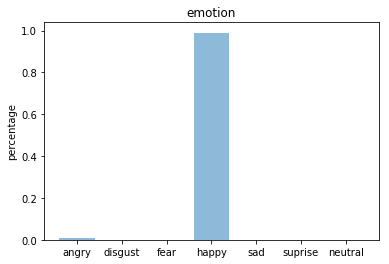

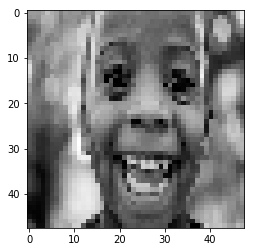

In [2]:
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model


model= load_model('model25.h5')

img = image.load_img('hap.png',grayscale=True,target_size=(48,48))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x/=255
custom= model.predict(x)
emotion_analysis(custom[0])
x=np.array(x,'float32')
x=x.reshape([48,48]);
plt.gray()
plt.imshow(x)
plt.show()





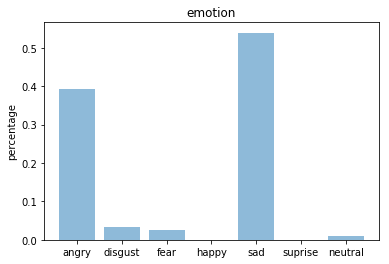

<Figure size 432x288 with 0 Axes>

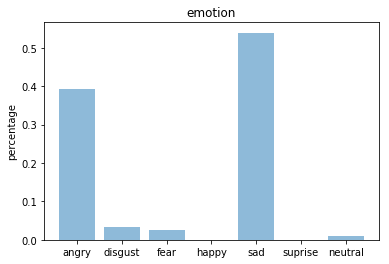

<Figure size 432x288 with 0 Axes>

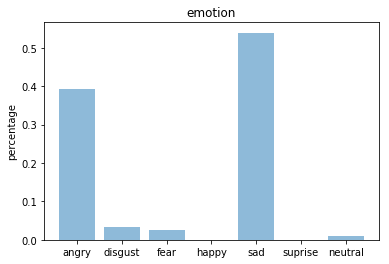

<Figure size 432x288 with 0 Axes>

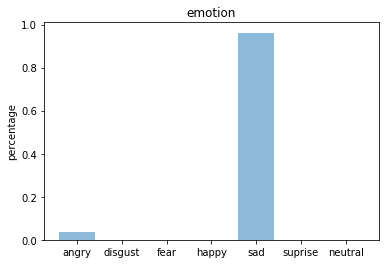

<Figure size 432x288 with 0 Axes>

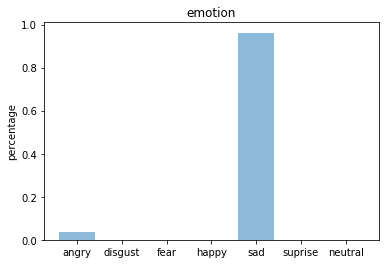

<Figure size 432x288 with 0 Axes>

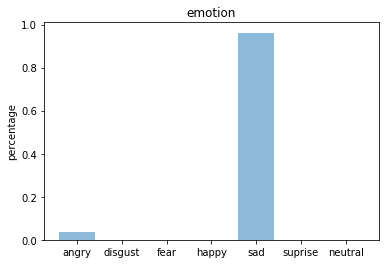

<Figure size 432x288 with 0 Axes>

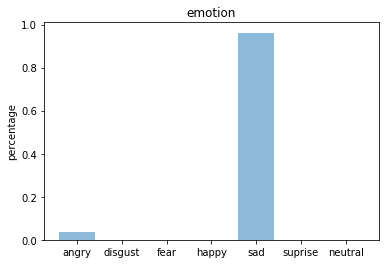

<Figure size 432x288 with 0 Axes>

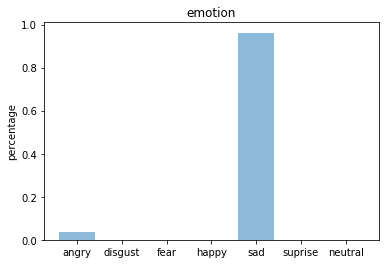

<Figure size 432x288 with 0 Axes>

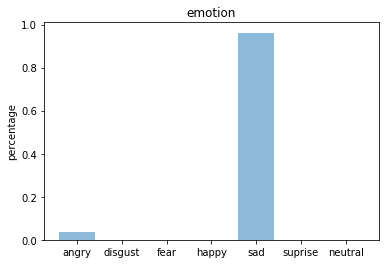

<Figure size 432x288 with 0 Axes>

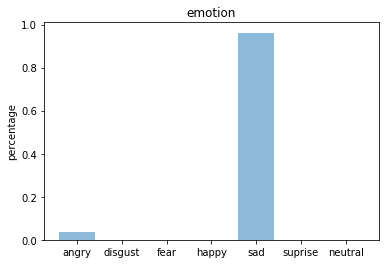

<Figure size 432x288 with 0 Axes>

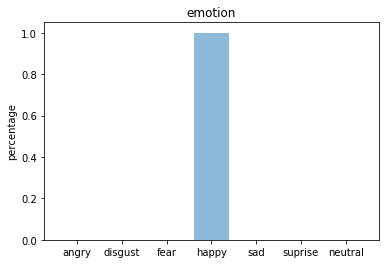

<Figure size 432x288 with 0 Axes>

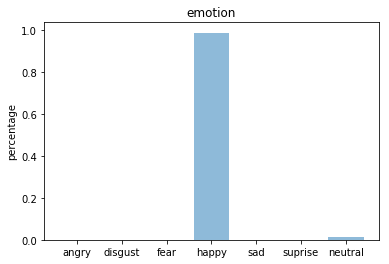

<Figure size 432x288 with 0 Axes>

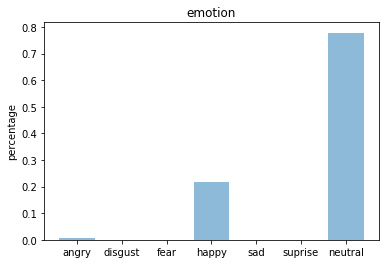

<Figure size 432x288 with 0 Axes>

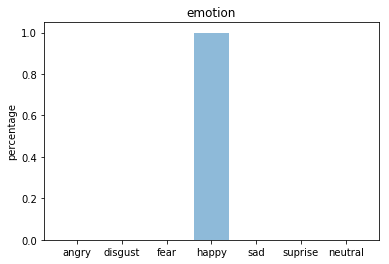

<Figure size 432x288 with 0 Axes>

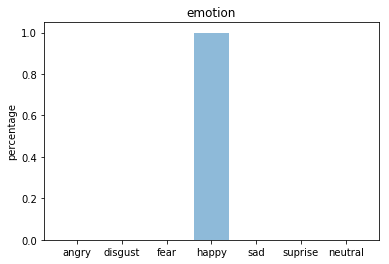

<Figure size 432x288 with 0 Axes>

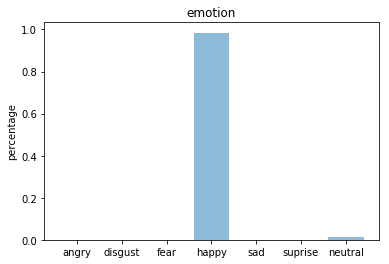

<Figure size 432x288 with 0 Axes>

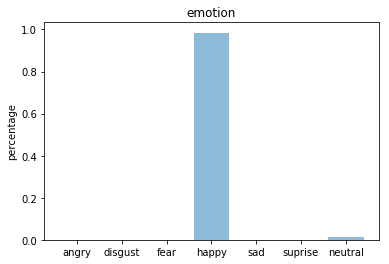

<Figure size 432x288 with 0 Axes>

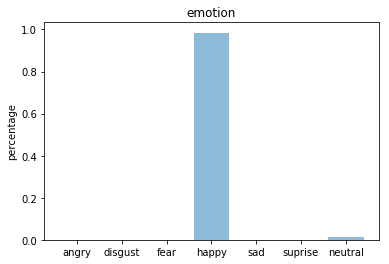

<Figure size 432x288 with 0 Axes>

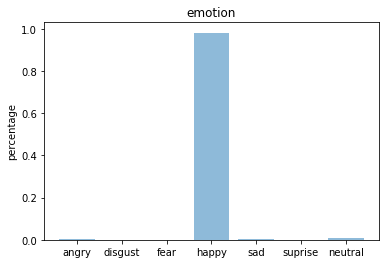

<Figure size 432x288 with 0 Axes>

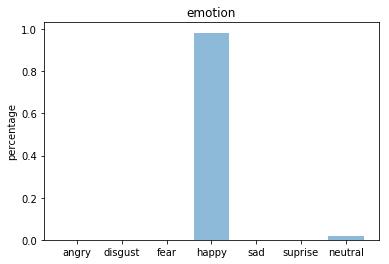

<Figure size 432x288 with 0 Axes>

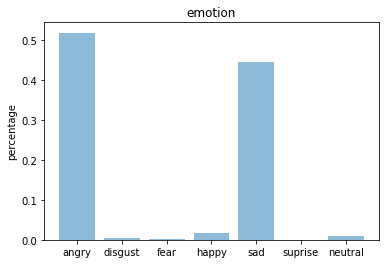

<Figure size 432x288 with 0 Axes>

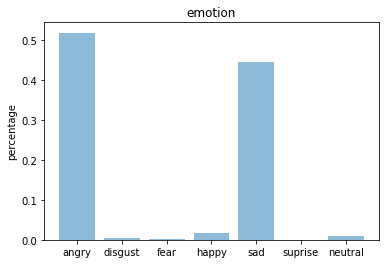

<Figure size 432x288 with 0 Axes>

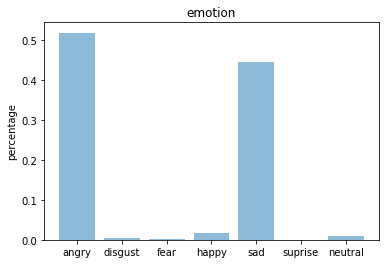

<Figure size 432x288 with 0 Axes>

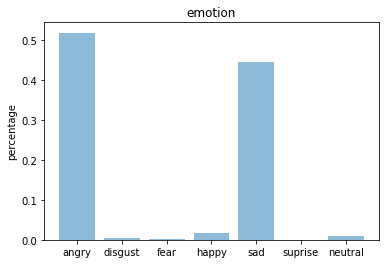

<Figure size 432x288 with 0 Axes>

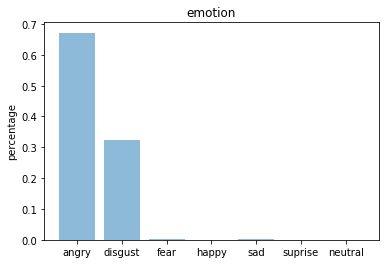

<Figure size 432x288 with 0 Axes>

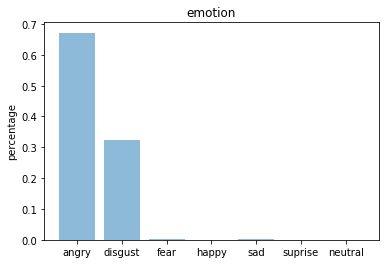

<Figure size 432x288 with 0 Axes>

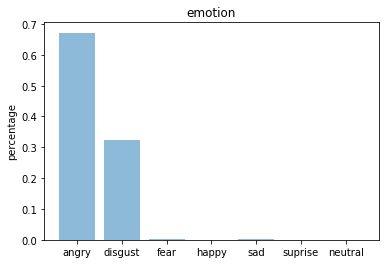

<Figure size 432x288 with 0 Axes>

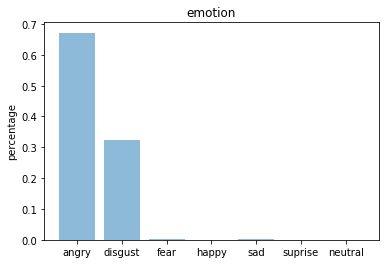

<Figure size 432x288 with 0 Axes>

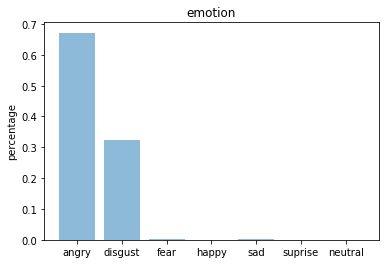

<Figure size 432x288 with 0 Axes>

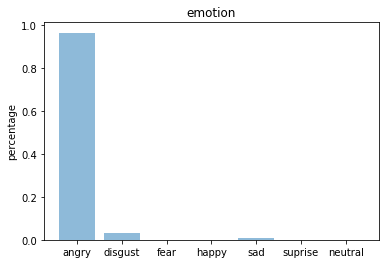

<Figure size 432x288 with 0 Axes>

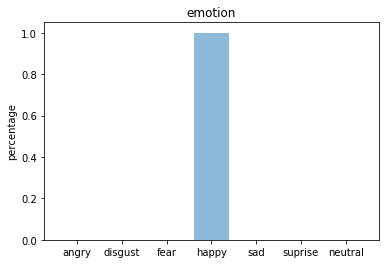

<Figure size 432x288 with 0 Axes>

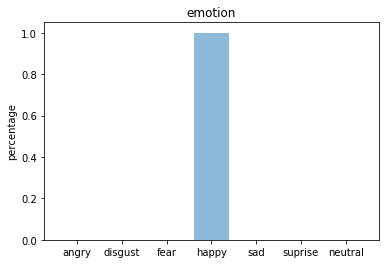

<Figure size 432x288 with 0 Axes>

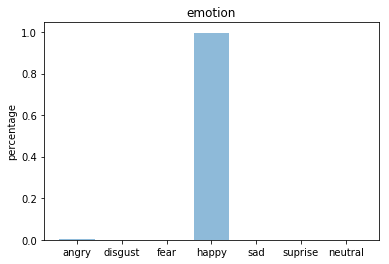

<Figure size 432x288 with 0 Axes>

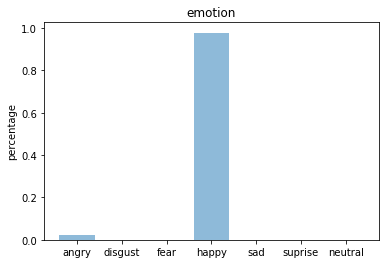

<Figure size 432x288 with 0 Axes>

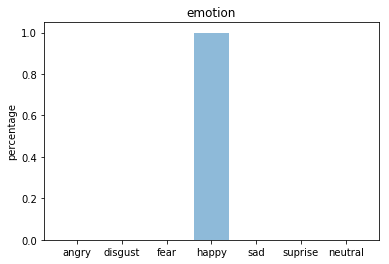

<Figure size 432x288 with 0 Axes>

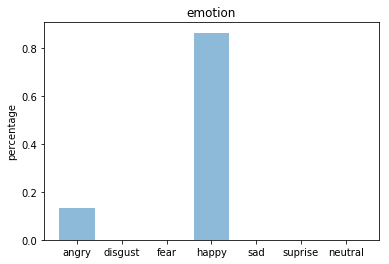

<Figure size 432x288 with 0 Axes>

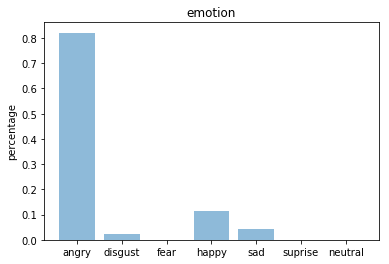

<Figure size 432x288 with 0 Axes>

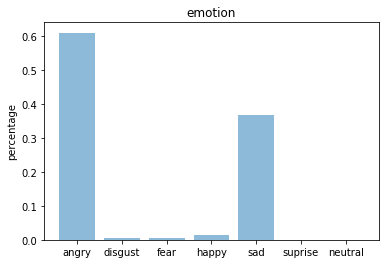

<Figure size 432x288 with 0 Axes>

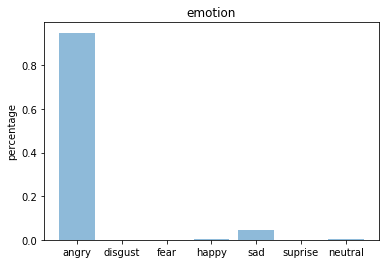

<Figure size 432x288 with 0 Axes>

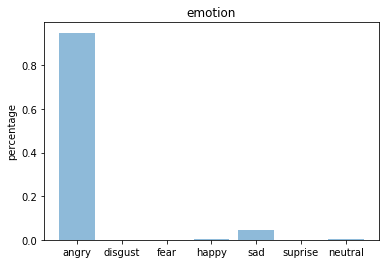

<Figure size 432x288 with 0 Axes>

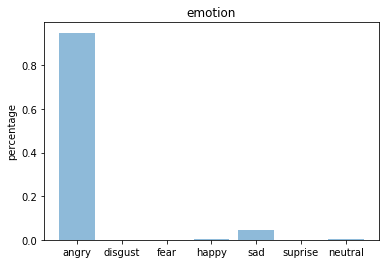

<Figure size 432x288 with 0 Axes>

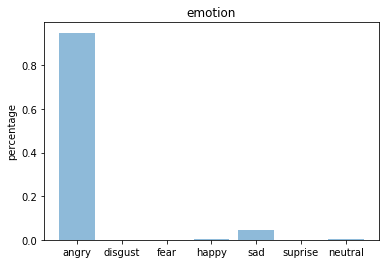

<Figure size 432x288 with 0 Axes>

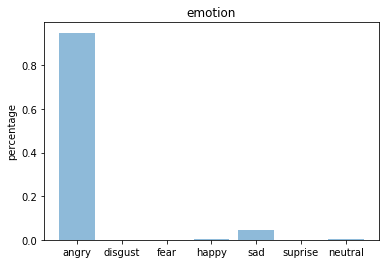

<Figure size 432x288 with 0 Axes>

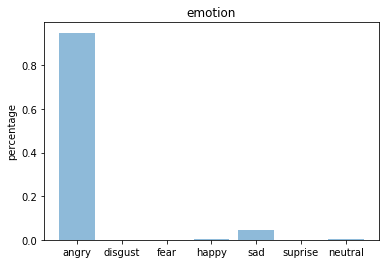

<Figure size 432x288 with 0 Axes>

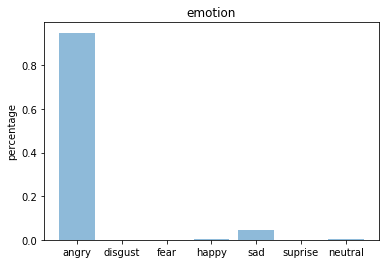

<Figure size 432x288 with 0 Axes>

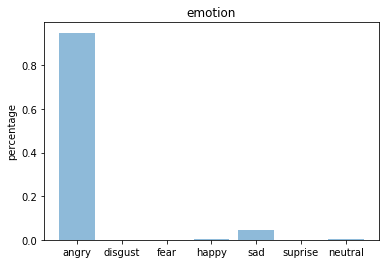

<Figure size 432x288 with 0 Axes>

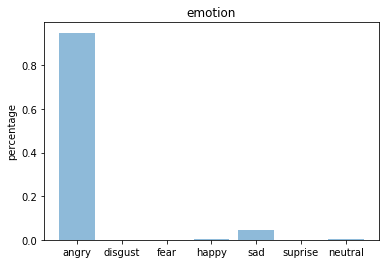

<Figure size 432x288 with 0 Axes>

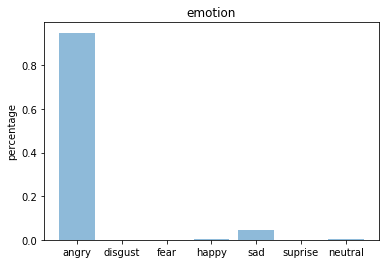

<Figure size 432x288 with 0 Axes>

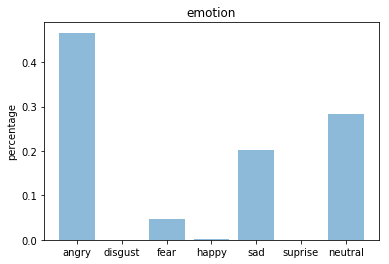

<Figure size 432x288 with 0 Axes>

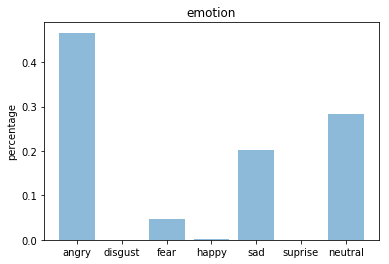

<Figure size 432x288 with 0 Axes>

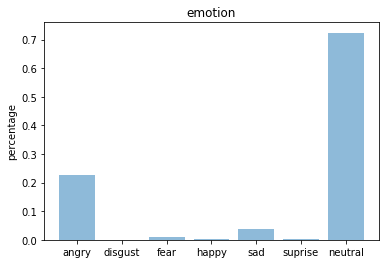

<Figure size 432x288 with 0 Axes>

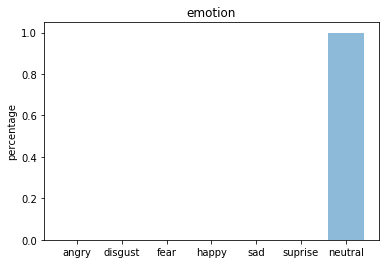

<Figure size 432x288 with 0 Axes>

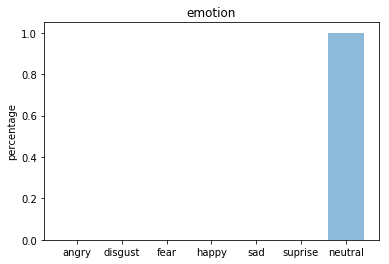

<Figure size 432x288 with 0 Axes>

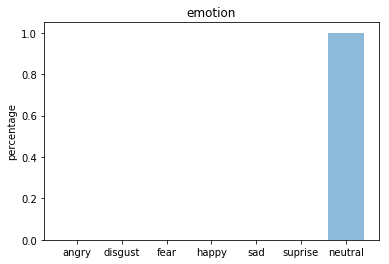

<Figure size 432x288 with 0 Axes>

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import load_model
from keras.preprocessing import image

model= load_model('model25.h5')

faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
cap = cv2.VideoCapture(0)
cap.set(3,640) # set Width
cap.set(4,480) # set Height
while True:
    ret, img = cap.read()
  #  ret,img= video_capture.read()
   # img = cv2.flip(img, -1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,     
        scaleFactor=1.2,
        minNeighbors=5,     
        minSize=(20, 20)
    )
    for (x,y,w,h) in faces:
        haar=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]  
    cv2.imshow('video',img)
    #grayy = cv2.cvtColor(roi_gray, cv2.COLOR_BGR2GRAY)
    #plt.imshow(haar)
    #plt.imshow(roi_gray)
    #plt.imshow(roi_color)
    dim = (48,48)
       # har= roi_gray.reshape(48,48,1)
    resized = cv2.resize(roi_gray, dim, interpolation = cv2.INTER_AREA)
    # real-time detection 
    x=image.img_to_array(resized)
    x=np.expand_dims(x,axis=0)
    x/=255
    custom= model.predict(x)
    emotion_analysis(custom[0])
    x=np.array(x,'float32')
    x=x.reshape([48,48]);
    plt.gray()
    #plt.imshow(x)
    plt.show()
    
    
    
    #plt.imshow(har)
    k = cv2.waitKey(30) & 0xff
    if k == 27: # press 'ESC' to quit
        break
        
        
cap.release()
cv2.destroyAllWindows()